Окие доки, время попробовать что-то смоделировать
# Моделирование <a class="anchor" id="моделирование"></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from IPython.display import clear_output

### Prep <a class="anchor" id="prep"></a>

In [2]:
pd.set_option('display.max_columns', 500)
plt.style.use('fivethirtyeight')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
random_state = 0

In [3]:
df = pd.read_csv('data/clean.csv')
df.head()

,A1,A2,A3,A5,A9,A10,A11,A19,A20,A21,A23,A24,A25,A26,A28,A29,A30,A31,A32,A33,A36,B5,B7,B8,B12,B13,B14,B15,B16,B17,B18,B21,B22,B27,B34,B35,B37,B38,B39,B40,B41,B43,B44,B45,B47,B48,B49,B50,B51,B52,B55,B56,B57,B60,B61,B62,B70,B81,анемия
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [92]:
# Разбиение на валидационную и тренировочную выборки со стратификацией по искомому полю
# Для показания результатов это надо:
#   В валидационной и тренировочной выборке одинаковое соотношение 
#   классов "с анемией" и "без анемии"
# Для финальной модели это плохо:
#   Модель могла "не увидеть" некоторые примеры "с анемией"
#   про примеры "без анемии" я молчу, их очень много
df_train, df_test = train_test_split(df, test_size=0.10, stratify=df['анемия'], shuffle=True, random_state=random_state)

In [93]:
y_train = df_train.pop('анемия')
x_train = df_train.copy()

y_test = df_test.pop('анемия')
x_test = df_test.copy()

tt = df.copy()
y = tt.pop('анемия')
x = tt.copy()

In [223]:
def visualise_sets(train_pred, whole_pred, test_pred):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (7,7))

    mat_train = confusion_matrix(y_train, train_pred)
    sns.heatmap(mat_train, ax = ax1, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    ax1.set_title('Train set')

    mat_whole = confusion_matrix(y, whole_pred)
    sns.heatmap(mat_whole, ax=ax2, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    ax2.set_title('Whole dataset')

    mat_test = confusion_matrix(y_test, test_pred)
    sns.heatmap(mat_test, ax=ax3, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    ax3.set_title('Test set')

    # Conf matrices output
    ax4.axis('off')
    for ax in fig.get_axes():
        ax.label_outer()
        ax.set(xlabel='Predictions', ylabel='Ground truth')
    plt.show()


def test_model(clf, name: str, visualize=True) -> list[float]:
    train_set = round(clf.score(x_train, y_train) * 100, 2)
    test_set = round(clf.score(x_test, y_test) * 100, 2)
    whole_set = round(clf.score(x, y) * 100, 2)

    # Numeric output
    print('=========================================================')
    print(f'Tested {name} classifier')
    print(f'Success rate on train subset = {train_set}%')
    print(f'Success rate on test subset = {test_set}%')
    print(f'Success rate on whole dataset = {whole_set}%')
    print('=========================================================')
    
    train_pred = clf.predict(x_train)
    whole_pred = clf.predict(x)
    test_pred = clf.predict(x_test)

    if visualize:
        visualise_sets(train_pred, whole_pred, test_pred)

    return test_pred, [train_set, test_set, whole_set]


Ура, сами модели  
После отдельных блоков есть общая табличка, можете игнорировать и бежать сразу туда

## Одиночная модель <a class="anchor" id="одиночная-модель"></a>

### 1. Random Forest

Tested Random Forest classifier
Success rate on train subset = 98.98%
Success rate on test subset = 77.27%
Success rate on whole dataset = 96.78%


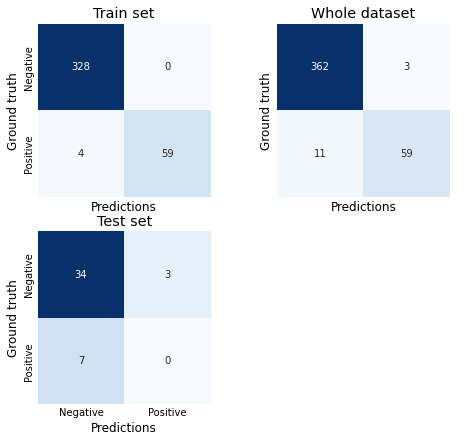

In [252]:
rfc = RandomForestClassifier(n_estimators=1000, 
                             random_state=0)
rfc.fit(x_train, y_train)
rfc_pred, random_forest_res = test_model(rfc, 'Random Forest')

### 2. Logistic Regression

Tested Logistic Regression classifier
Success rate on train subset = 83.89%
Success rate on test subset = 84.09%
Success rate on whole dataset = 83.91%


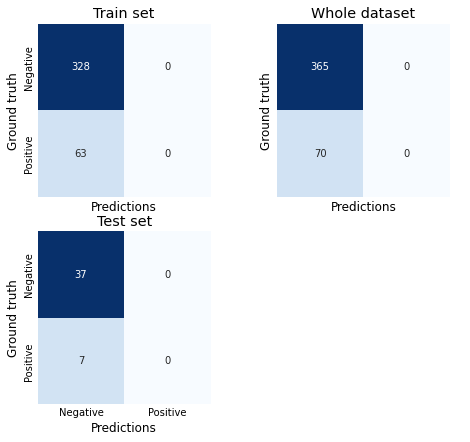

In [226]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred, logreg_res = test_model(logreg, 'Logistic Regression')

### 3. Support Vector Machines

Tested Support Vector Machines classifier
Success rate on train subset = 83.89%
Success rate on test subset = 84.09%
Success rate on whole dataset = 83.91%


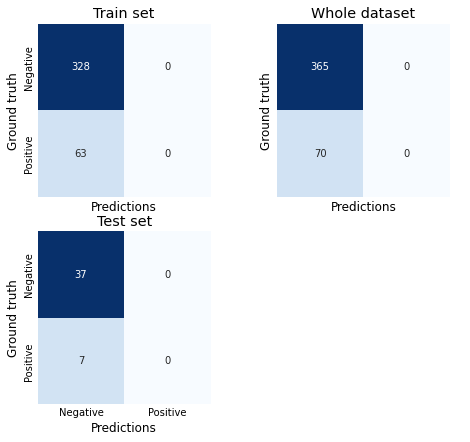

In [227]:
svc = SVC()
svc.fit(x_train, y_train)

svc_pred, svc_res = test_model(svc, 'Support Vector Machines')

### 4. k-Nearest Neighbors

Tested k-Nearest Neighbors classifier
Success rate on train subset = 98.98%
Success rate on test subset = 70.45%
Success rate on whole dataset = 96.09%


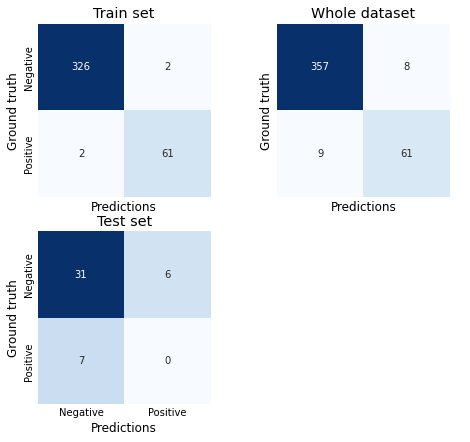

In [243]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)

knn_pred, knn_res = test_model(knn, 'k-Nearest Neighbors')

### 5. Gaussian Naive Bayes

Tested Gaussian Naive Bayes classifier
Success rate on train subset = 31.2%
Success rate on test subset = 34.09%
Success rate on whole dataset = 31.49%


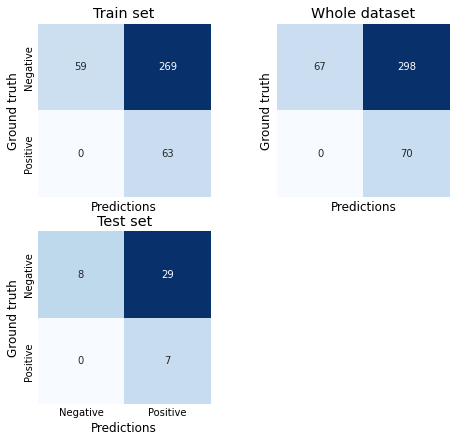

In [229]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)

gaussian_pred, gaussian_res = test_model(gaussian, 'Gaussian Naive Bayes')

### 6. Perceptron

Tested Perceptron classifier
Success rate on train subset = 84.4%
Success rate on test subset = 84.09%
Success rate on whole dataset = 84.37%


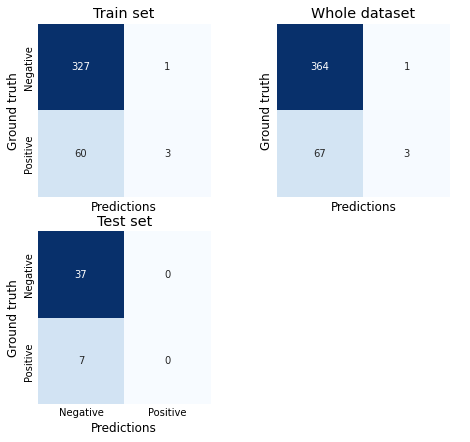

In [230]:
perceptron = Perceptron()
perceptron.fit(x_train, y_train)

perceptron_pred, perceptron_res = test_model(perceptron, 'Perceptron')

### 7. Linear SVC

Tested Linear SVC classifier
Success rate on train subset = 84.14%
Success rate on test subset = 84.09%
Success rate on whole dataset = 84.14%


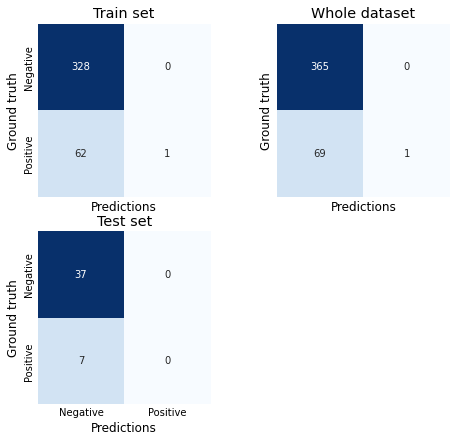

In [231]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

linear_svc_pred, linear_svc_res = test_model(linear_svc, 'Linear SVC')

### 8. Stochastic Gradient Descent

Tested Stochastic Gradient Descent classifier
Success rate on train subset = 84.91%
Success rate on test subset = 72.73%
Success rate on whole dataset = 83.68%


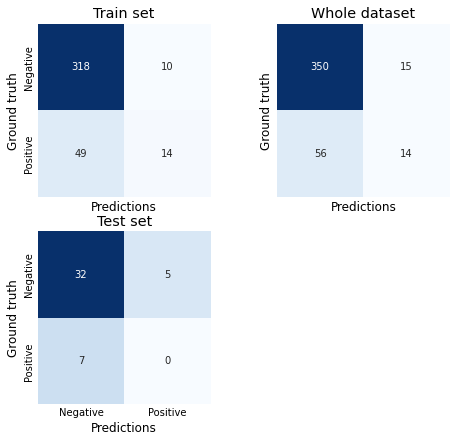

In [232]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)

sgd_pred, sgd_res = test_model(sgd, 'Stochastic Gradient Descent')

### Результаты одиночных моделей

In [103]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent', 'Linear SVC'],
    'Test Score': [svc_res[1], knn_res[1], logreg_res[1],
                   random_forest_res[1], gaussian_res[1], perceptron_res[1],
                   sgd_res[1], linear_svc_res[1]],

    'Train Score': [svc_res[0], knn_res[0], logreg_res[0],
              random_forest_res[0], gaussian_res[0], perceptron_res[0],
              sgd_res[0], linear_svc_res[0]],
    'Whole set Score': [svc_res[2], knn_res[2], logreg_res[2],
                        random_forest_res[2], gaussian_res[2], perceptron_res[2],
                        sgd_res[2], linear_svc_res[2]]})
models.sort_values(by=['Test Score'], ascending=False)

# Пожалуйста, игнорируйте левые индексы и очередность разных оценок
# Здесь идет сортировка по тестовой выборке

,Model,Test Score,Train Score,Whole set Score
0,Support Vector Machines,84.09,83.89,83.91
2,Logistic Regression,84.09,83.89,83.91
5,Perceptron,84.09,84.40,84.37
7,Linear SVC,84.09,84.14,84.14
6,Stochastic Gradient Decent,81.82,82.35,82.30
3,Random Forest,77.27,98.98,96.78
1,KNN,75.00,86.70,85.52
4,Naive Bayes,34.09,31.20,31.49


In [104]:
models.sort_values(by=['Whole set Score'], ascending=False)

# А здесь сортировка по всему датасету

,Model,Test Score,Train Score,Whole set Score
3,Random Forest,77.27,98.98,96.78
1,KNN,75.00,86.70,85.52
5,Perceptron,84.09,84.40,84.37
7,Linear SVC,84.09,84.14,84.14
0,Support Vector Machines,84.09,83.89,83.91
2,Logistic Regression,84.09,83.89,83.91
6,Stochastic Gradient Decent,81.82,82.35,82.30
4,Naive Bayes,34.09,31.20,31.49


### 9. (Бонус) Neaural Net


In [105]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from keras import regularizers
from tensorflow.keras.optimizers import Adamax


In [119]:
# перегон данных в формат, который понравится DNN
tf_x_train = tf.convert_to_tensor(x_train)
tf_y_train = tf.convert_to_tensor(y_train)
tf_y_train = tf.one_hot(tf_y_train, 2, on_value=0.0, off_value=1.0)

tf_x_test = tf.convert_to_tensor(x_test)
tf_y_test = tf.convert_to_tensor(y_test)
tf_y_test = tf.one_hot(tf_y_test, 2, on_value=0.0, off_value=1.0)


In [121]:
# сама модель, я пробовал много разных, делать модель шире и глубже смысла нет - результат одинаковый
model = Sequential()

model.add(Input(shape = (58,)))
model.add(Dense(32, kernel_regularizer=regularizers.l2(l=0.016), activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006), activation='relu'))
# model.add(BatchNormalization())
# model.add(Dense(128, kernel_regularizer=regularizers.l2(l=0.016), activity_regularizer=regularizers.l1(0.006),
#                 bias_regularizer=regularizers.l1(0.006), activation='relu'))
# model.add(Dense(512, kernel_regularizer=regularizers.l2(l=0.016), activity_regularizer=regularizers.l1(0.006),
#           bias_regularizer=regularizers.l1(0.006), activation='relu'))
# model.add(Dense(128, kernel_regularizer=regularizers.l2(l=0.016), activity_regularizer=regularizers.l1(0.006),
#           bias_regularizer=regularizers.l1(0.006), activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(Adamax(learning_rate = 0.01),
              loss=tf.keras.losses.BinaryCrossentropy(label_smoothing = 0.1),
              metrics = ['Accuracy'])


In [122]:
model.fit(tf_x_train, tf_y_train,
    epochs = 1,
    batch_size = 16,
    validation_data = (tf_x_test, tf_y_test)
)

25/25 [==============================] - 1s 15ms/step - loss: 0.8727 - Accuracy: 0.7980 - val_loss: 0.6471 - val_Accuracy: 0.8409


In [123]:
preds = model.predict(tf_x_test)
res = []
for idx in range(len(preds)):
    res.append(np.argmax(y[idx]) == np.argmax(preds[idx]))
    # print(f'True idx = {np.argmax(true[idx])}')
    # print(f'Predicted idx = {np.argmax(preds[idx])}')
print(f'Accuracy: {np.sum(y) / np.sum(res)*100:.04}%')


2/2 [==============================] - 0s 3ms/step
Accuracy: inf%


C:\Users\3mpti\AppData\Local\Temp\ipykernel_15508\362923115.py:7: RuntimeWarning: divide by zero encountered in longlong_scalars
  print(f'Accuracy: {np.sum(y) / np.sum(res)*100:.04}%')


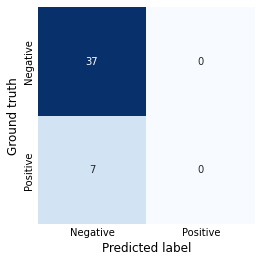

In [124]:
mat = confusion_matrix(y_test, res)

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted label')
plt.ylabel('Ground truth')
plt.show()

In [125]:
# Тоже самое, что и confusion matrix, но немного в другом формате
preds = (preds > 0.5)
clr = classification_report(tf_y_test, preds, \
                            target_names=['True', 'False'], \
                            digits=4, \
                            zero_division = 0)
print(f"Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

        True     0.0000    0.0000    0.0000         7
       False     0.8409    1.0000    0.9136        37

   micro avg     0.8409    0.8409    0.8409        44
   macro avg     0.4205    0.5000    0.4568        44
weighted avg     0.7071    0.8409    0.7682        44
 samples avg     0.8409    0.8409    0.8409        44



### Небольшие выводы

Данные несбалансированны, это очень явно, соотношение 5:1 это оч жестко. Большинство моделей, а именно `Simple DNN`, `LogReg`, `SVM`, `Linear SVM`, `SGD` и `Perceptron` решили, что науличший результат они получат, если все данные припишут к более частому классу.  
`Gaussian Naive Bayes` выдает что-то непонятное.  
Остаются `Random Forest` и `KNN`. И если хороший результат первой модели я еще ожидал, то вторая удивила. Простую полносвязную нейронку я выбрасывать пока не буду, хотя вероятно смысла в ней не густо и результаты она будет выдавать на уровне RF. Вообще, возможно не стоит вообще ничего выбрать, а отбалансировать данные и попробовать все модели снова  

Попробую занятсья ансаблированием

## Ансамбли

### Prep

In [158]:
from sklearn.utils import shuffle

In [166]:
df_train, df_test = train_test_split(
                                    df, test_size=0.10, 
                                    stratify=df['анемия'], 
                                    shuffle=True, 
                                    random_state=random_state
                                    )


In [167]:
len(df_train.loc[df['анемия'] == 0]) / len(df_train.loc[df['анемия'] == 1])

5.2063492063492065

In [168]:
# Составляю сабсет только с позитивными случаями и сабсет только в негативными, последний дроблю на 5
df_positive = df_train.loc[df_train['анемия'] == 1].copy()
df_negative = np.array_split(df_train.loc[df_train['анемия'] == 0], 5)

In [275]:
def create_ensemble(clf_func, args):
    classifiers = []
    for ndf in df_negative:
        clf = clf_func(**args)
        sub_df = pd.concat([df_positive, ndf])
        sub_df = shuffle(sub_df, random_state=random_state)
        y_sub = sub_df.pop('анемия')
        x_sub = sub_df.copy()
        clf.fit(x_sub, y_sub)
        classifiers.append(clf)
    return classifiers

def prediction_on_ensemble(x, y, ensemble, show = False):
    preds = []
    for clf in ensemble:
        pred = clf.predict(x)
        preds.append(pred)

    preds = sum(np.array(preds) / 5)

    res = []
    for idx in range(len(preds)):
        res.append(np.array(y)[idx] == round(preds[idx]))
        
    if not show:
        return res
        
    mat = confusion_matrix(y, res)

    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted label')
    plt.ylabel('Ground truth')
    plt.show()

    return res

def visualise_ensemble(ensemble):
    visualise_sets(prediction_on_ensemble(x_train, y_train, ensemble),
                   prediction_on_ensemble(x, y, ensemble),
                   prediction_on_ensemble(x_test, y_test, ensemble))
    

### 1. Random Forest Ensemble

In [272]:
rf_ensemble = create_ensemble(RandomForestClassifier, {'n_estimators': 1000, 'random_state' : 0})

#### Пример каждого классификатора ансамбля по отдельности

Tested RF #1 classifier
Success rate on train subset = 65.98%
Success rate on test subset = 43.18%
Success rate on whole dataset = 63.68%


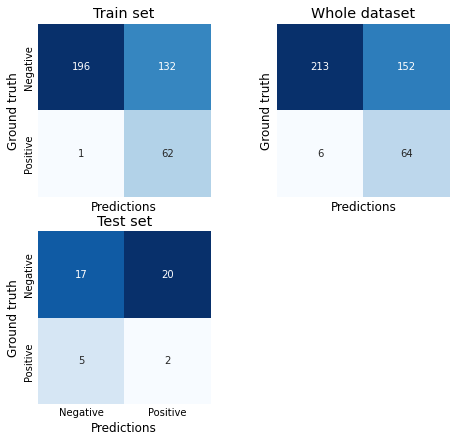

Tested RF #2 classifier
Success rate on train subset = 62.92%
Success rate on test subset = 56.82%
Success rate on whole dataset = 62.3%


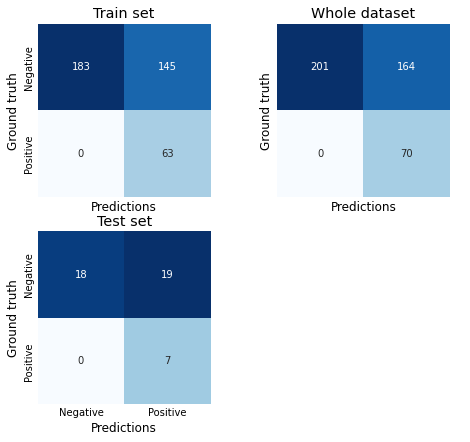

Tested RF #3 classifier
Success rate on train subset = 60.36%
Success rate on test subset = 56.82%
Success rate on whole dataset = 60.0%


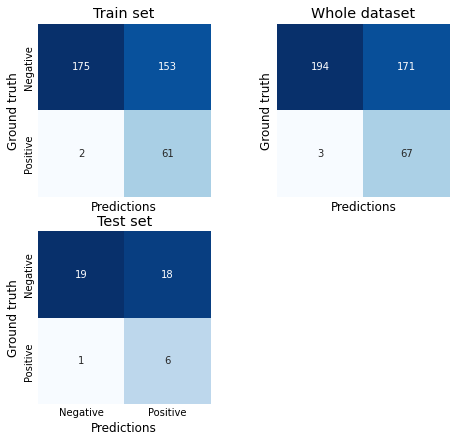

Tested RF #4 classifier
Success rate on train subset = 64.96%
Success rate on test subset = 50.0%
Success rate on whole dataset = 63.45%


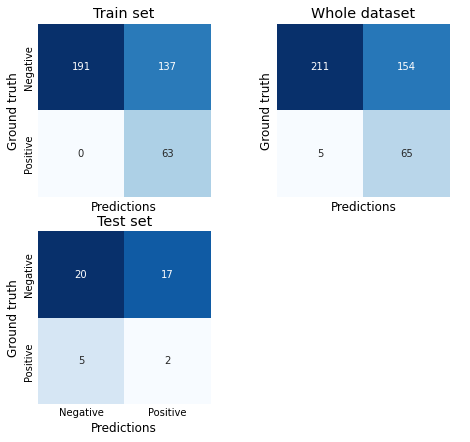

Tested RF #5 classifier
Success rate on train subset = 65.47%
Success rate on test subset = 50.0%
Success rate on whole dataset = 63.91%


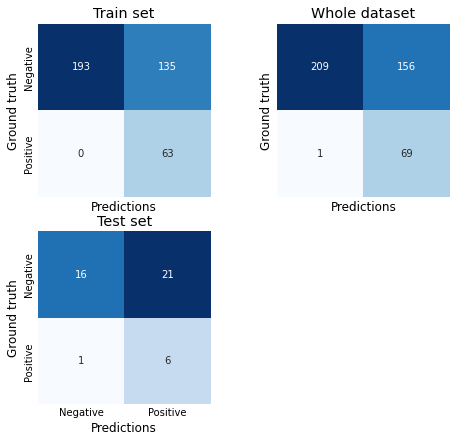

In [273]:
# покажу пример насколько каждый классификатор по отдельности говно
i = 1
for clf in rf_ensemble:
    test_model(clf, f'RF #{i}')
    i+=1


Ну то есть каждый классификатор по отдельности говно  

Но если попробовать обьединить их результаты....

#### Ансмаль результаты

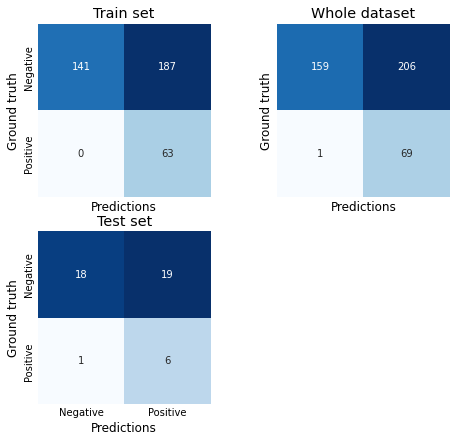

In [274]:
visualise_ensemble(rf_ensemble)

### 2. LogReg Ensemble

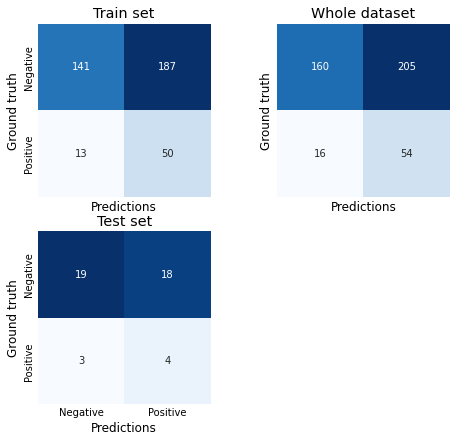

In [277]:
logreg_ensemble = create_ensemble(LogisticRegression, {})
visualise_ensemble(logreg_ensemble)


### 3. SVM Ensemble

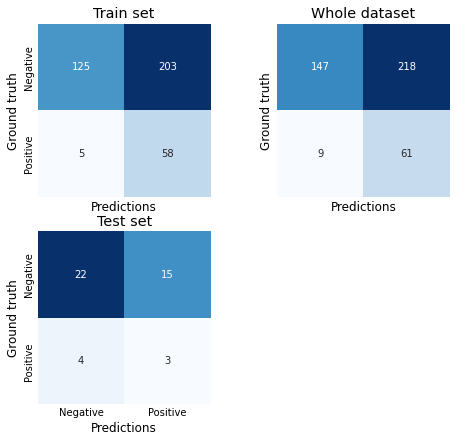

In [278]:
svm_ensemble = create_ensemble(SVC, {})
visualise_ensemble(svm_ensemble)

### 4. KNN Ensemble

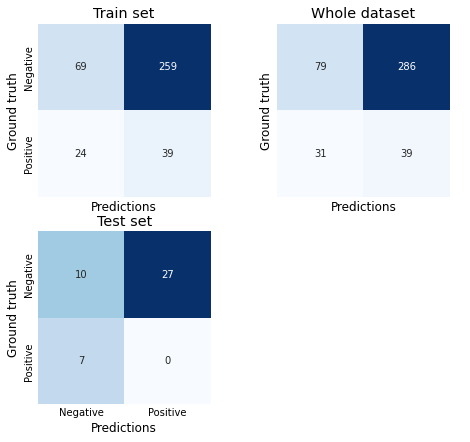

In [279]:
knn_ensemble = create_ensemble(KNeighborsClassifier, {'n_neighbors': 2})
visualise_ensemble(knn_ensemble)

### 5. GNB Ensebmle

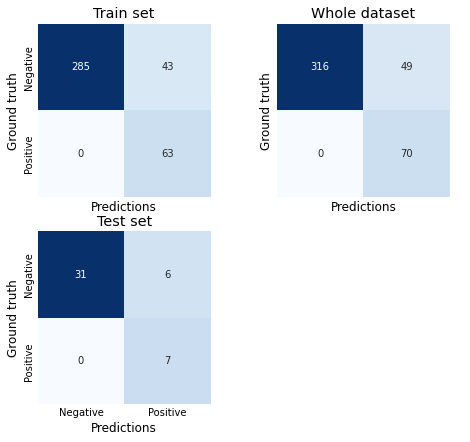

In [280]:
gnb_ensemble = create_ensemble(GaussianNB, {})
visualise_ensemble(gnb_ensemble)

### 6. Perceptron Ensemble

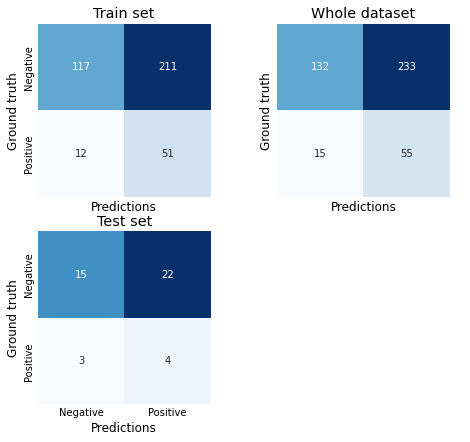

In [281]:
perceptron_ensemble = create_ensemble(Perceptron, {})
visualise_ensemble(perceptron_ensemble)

### 7. Linear SVC Ensemble

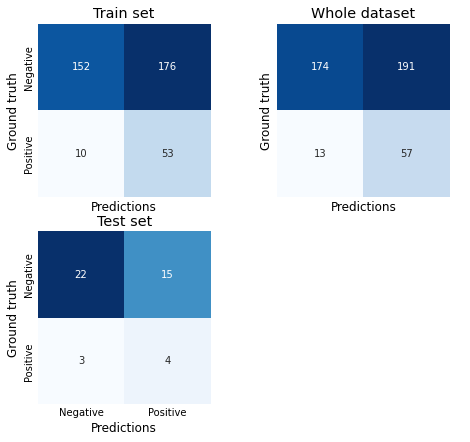

In [282]:
lsvc_ensemble = create_ensemble(LinearSVC, {})
visualise_ensemble(lsvc_ensemble)

### 8. SGD Ensemble

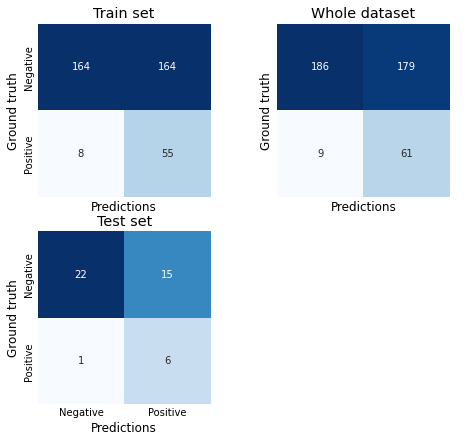

In [283]:
sgd_ensemble = create_ensemble(SGDClassifier, {})
visualise_ensemble(sgd_ensemble)

### Вывод по ансамблям

В моем виде они - говно

## Идеи под конец

Пока что я в тупике:
- Большинство моделей, кроме прям нескольких, очень плохо относятся к таким несбалансированным данным
- Метод анмамблирования в вакууме не помогает, но возможно я просто делаю его неверно
- Оптимизация гиперпараметров в вакууме не помогает
- Очистка датасета в вакууме не помогает

На сейчас идеи 3:
- Я что-то очень сильно упускаю в очистке данных и методах
- Использую не те модели
- Антигены сами по себе не влияют на анемию